In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from tqdm import tqdm
import pickle

In [2]:
def plot_confusion_matrix(confusion_matrix):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

# Importing the data

In [3]:
! ls

APS Failure - Data Analysis.ipynb   aps_failure_description.txt
APS Failure - Modelling.ipynb       aps_failure_test_set.csv
Data Intake Report_APS Failure.docx aps_failure_training_set.csv
Data Intake Report_APS Failure.pdf  test_standardized.csv
Notes                               train_standardized.csv


In [4]:
train = pd.read_csv('train_standardized.csv')
test = pd.read_csv('test_standardized.csv')

In [5]:
train.drop('Unnamed: 0', axis=1, inplace=True)
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.119381,-6.685778e-17,2.297451,-5.431343e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,...,0.691902,0.522440,0.236978,0.068038,0.005736,-0.109591,-0.146551,-0.177717,-0.021220,-0.024659
1,0,-0.180697,-6.685778e-17,-0.460883,8.304736e-19,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,...,-0.020965,-0.061196,-0.131205,-0.133241,-0.187559,-0.154294,-0.092070,-0.145940,-0.021220,-0.024659
2,0,-0.125811,-6.685778e-17,-0.460883,-5.436479e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,...,-0.146305,-0.094980,-0.018715,0.014010,-0.011581,-0.109552,-0.097547,-0.166828,-0.021220,-0.024659
3,0,-0.407928,-4.294831e-01,-0.460883,-5.437449e-03,-0.043121,-0.004902,-0.010884,-0.028691,-0.057574,...,-0.387494,-0.390696,-0.383624,-0.353355,-0.313264,-0.201514,-0.310368,-0.177717,0.915878,3.684257
4,0,0.010572,-6.685778e-17,-0.460881,-5.426264e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,...,0.153624,0.034545,-0.034806,-0.041945,-0.043365,-0.020200,0.660478,-0.151914,-0.021220,-0.024659


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [7]:
test.drop('Unnamed: 0', axis=1, inplace=True)
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,-0.134924,-0.625507,-0.463018,-0.317962,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,...,-0.371765,-0.381575,-0.372000,-0.339486,-0.298457,-0.217653,-0.270395,-0.161586,-0.019728,-0.017343
1,0,-0.134881,-0.625507,-0.463018,-0.297136,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,...,-0.371789,-0.381337,-0.371042,-0.339915,-0.298450,-0.217422,-0.270395,-0.161586,-0.019728,-0.017343
2,0,-0.003962,0.994841,-0.463018,-0.243585,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,...,0.024176,0.274737,-0.022982,-0.124697,0.804419,-0.122767,-0.269428,-0.161586,-0.019728,-0.017343
3,0,-0.016248,0.000000,-0.463017,0.369284,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,...,0.060842,0.038093,0.011282,0.047656,0.063283,-0.087927,0.257482,-0.100579,-0.019728,-0.017343
4,0,-0.131441,0.000000,-0.463018,-0.222759,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,...,-0.366517,-0.374661,-0.357671,-0.300244,-0.295858,-0.217410,-0.270252,-0.161586,-0.019728,-0.017343


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 20.9 MB


# Imbalanced dataset

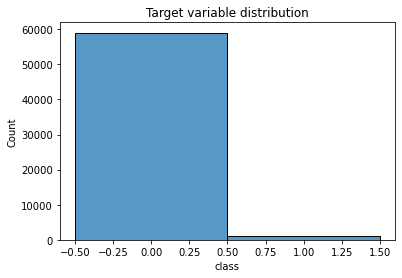

In [9]:
sns.histplot(train, x='class', discrete=True)
plt.title('Target variable distribution')
plt.show()

In [10]:
# Loading variables with target and features
y_train = train['class']
X_train = train.drop('class', axis=1)

y_test = test['class']
X_test = test.drop('class', axis=1)

## Resampling the dataset

In [11]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [12]:
y_train_res.value_counts()

1    59000
0    59000
Name: class, dtype: int64

In [13]:
y_train.value_counts()

0    59000
1     1000
Name: class, dtype: int64

# Modelling

The following algorithms will be applied on the data:

- SVM
- k-Nearest Neighbours
- Logistic Regression
- Random Forest

## Support Vector Classifier

In [14]:
svc = SVC(random_state=123)
%timeit -n1 -r1 svc.fit(X_train_res, y_train_res)

5min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
predictions_svc = svc.predict(X_test)

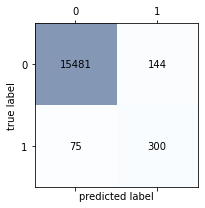

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.68      0.80      0.73       375

    accuracy                           0.99     16000
   macro avg       0.84      0.90      0.86     16000
weighted avg       0.99      0.99      0.99     16000

Accuracy upon the test data using SVC is 98.63 %


In [16]:
cnfmtx_1 = confusion_matrix(y_test, predictions_svc)
plot_confusion_matrix(cnfmtx_1)
print("=====================")
print(classification_report(y_test, predictions_svc))
accuracy_1 = accuracy_score(y_test, predictions_svc)
print("=====================")
print(f'Accuracy upon the test data using SVC is {100*accuracy_1:.2f} %')

## k-Nearest Neighbors

In [17]:
knn = KNeighborsClassifier()
%timeit -n1 -r1 knn.fit(X_train_res, y_train_res)

8.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
predictions_knn = knn.predict(X_test)

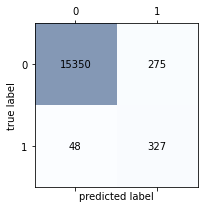

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.54      0.87      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.93      0.83     16000
weighted avg       0.99      0.98      0.98     16000

Accuracy upon the test data using kNN is 97.98 %


In [19]:
cnfmtx_2 = confusion_matrix(y_test, predictions_knn)
plot_confusion_matrix(cnfmtx_2)
print("=====================")
print(classification_report(y_test, predictions_knn))
accuracy_2 = accuracy_score(y_test, predictions_knn)
print("=====================")
print(f'Accuracy upon the test data using kNN is {100*accuracy_2:.2f} %')

## Logistic Regression

In [20]:
logreg = LogisticRegression()
%timeit -n1 -r1 logreg.fit(X_train_res, y_train_res)

1.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
predictions_logreg = logreg.predict(X_test)

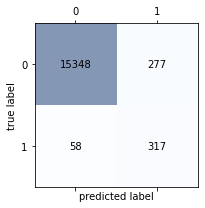

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.53      0.85      0.65       375

    accuracy                           0.98     16000
   macro avg       0.76      0.91      0.82     16000
weighted avg       0.99      0.98      0.98     16000

Accuracy upon the test data using Logistic Regression is 97.91 %


In [22]:
cnfmtx_3 = confusion_matrix(y_test, predictions_logreg)
plot_confusion_matrix(cnfmtx_3)
print("=====================")
print(classification_report(y_test, predictions_logreg))
accuracy_3 = accuracy_score(y_test, predictions_logreg)
print("=====================")
print(f'Accuracy upon the test data using Logistic Regression is {100*accuracy_3:.2f} %')

## Random Forest Classifier

In [23]:
rf = RandomForestClassifier()
%timeit -n1 -r1 rf.fit(X_train_res, y_train_res)

2min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
predictions_rf = rf.predict(X_test)

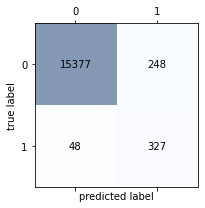

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.57      0.87      0.69       375

    accuracy                           0.98     16000
   macro avg       0.78      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000

Accuracy upon the test data using Random Forest is 98.15 %


In [25]:
cnfmtx_4 = confusion_matrix(y_test, predictions_rf)
plot_confusion_matrix(cnfmtx_4)
print("=====================")
print(classification_report(y_test, predictions_rf))
accuracy_4 = accuracy_score(y_test, predictions_rf)
print("=====================")
print(f'Accuracy upon the test data using Random Forest is {100*accuracy_4:.2f} %')

## Hyperparameter tuning

Here, we are interested in getting a higher recall (this is to reduce false negatives, as the cost is x50 higher than predicting a positive case when it is not).

Random Forest algorithm seems to perform better than the others for this purpose. kNN is a good option too. It's got the second best recall rate and its training time is relatively fast. SVC is slow for that task. Logistic Regression can also be a good option.

In [62]:
model_params = {
    
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 500]
        }
    },
    
    'k-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 7, 10]
        }
    },
    
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    }
}

In [63]:
# Given that running Grid Search using these algorithms, parameters and the dataset is not computationally efficient,
# We'll run it upon a subset of the data.
y_train_res_subset = y_train_res[int(np.quantile(y_train_res.index, 0.3)):int(np.quantile(y_train_res.index, 0.6))]
X_train_res_subset = X_train_res[int(np.quantile(X_train_res.index, 0.3)):int(np.quantile(X_train_res.index, 0.6))]

print(y_train_res_subset.value_counts())

scores = []

for algo_name, algoparam in tqdm(model_params.items()):
    gs_clf = GridSearchCV(algoparam['model'], algoparam['params'], scoring='recall', cv=3)
    gs_clf.fit(X_train_res_subset, y_train_res_subset)
    scores.append({
        'Algorithm': algo_name,
        'Best score': gs_clf.best_score_,
        'Best params': gs_clf.best_params_
    })

  0%|          | 0/3 [00:00<?, ?it/s]

0    24229
1    11171
Name: class, dtype: int64


 67%|██████▋   | 2/3 [12:32<06:45, 405.11s/it]/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

In [64]:
scores_df = pd.DataFrame(scores, columns=['Algorithm', 'Best score', 'Best params'])
scores_df

,Algorithm,Best score,Best params
0,Random Forest,0.990690,{'n_estimators': 500}
1,k-Nearest Neighbors,0.994987,{'n_neighbors': 5}
2,Logistic Regression,0.926685,{'C': 10}


In [65]:
model_params = {
    
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 500]
        }
    },
    
    'k-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 7, 10]
        }
    }
}

In [67]:
# Upon the whole dataset
scores = []

for algo_name, algoparam in tqdm(model_params.items()):
    gs_clf = GridSearchCV(algoparam['model'], algoparam['params'], scoring='recall', cv=3)
    gs_clf.fit(X_train_res, y_train_res)
    scores.append({
        'Algorithm': algo_name,
        'Best score': gs_clf.best_score_,
        'Best params': gs_clf.best_params_
    })

100%|██████████| 2/2 [1:22:30<00:00, 2475.19s/it]


In [68]:
scores_df = pd.DataFrame(scores, columns=['Algorithm', 'Best score', 'Best params'])
scores_df

,Algorithm,Best score,Best params
0,Random Forest,0.999288,{'n_estimators': 500}
1,k-Nearest Neighbors,0.999373,{'n_neighbors': 5}


In [71]:
bestRandomForest = RandomForestClassifier(n_estimators=500)
bestRandomForest.fit(X_train_res, y_train_res)
print(classification_report(y_test, bestRandomForest.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.58      0.87      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000



In [74]:
bestKNN = gs_clf.best_estimator_.fit(X_train_res, y_train_res)
with open('bestKNN_trained.pkl', 'wb') as f:
    pickle.dump(bestKNN, f)
    print('Pickling completed.')

Pickling completed.


# Model understanding 

A k-Nearest Neighbors algorithm that models our data with parameter n_neighbors = 5 has been found to perform well towards our goal (mainly, get a high recall) and it's able to train fast.

In [86]:
y_test[:4000].value_counts()

0    3898
1     102
Name: class, dtype: int64

In [87]:
perm = permutation_importance(bestKNN, X_test[:4000], y_test[:4000], scoring='recall', n_repeats=2, n_jobs=-1)
importance = perm.importances_mean

/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [88]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.01961
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00980
Feature: 9, Score: 0.00980
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00980
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00980
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.00980
Feature: 23, Score: -0.00980
Feature: 24, Score: -0.00980
Feature: 25, Score: 0.00980
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.000

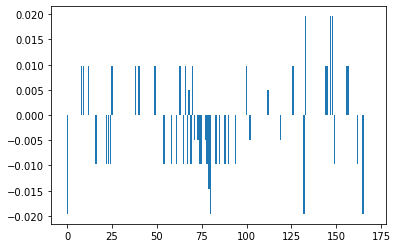

In [90]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [91]:
type(importance)

numpy.ndarray

In [92]:
importance

array([-0.01960784,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00980392,  0.00980392,
        0.        ,  0.        ,  0.00980392,  0.        ,  0.        ,
        0.        , -0.00980392,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00980392, -0.00980392, -0.00980392,
        0.00980392,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00980392,  0.        ,
        0.00980392,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00980392,
        0.        ,  0.        ,  0.        ,  0.        , -0.00980392,
        0.        ,  0.        ,  0.        , -0.00980392,  0.        ,
        0.        , -0.00980392,  0.        ,  0.00980392,  0.        ,
       -0.00980392,  0.00980392, -0.00980392,  0.00490196, -0.00

In [96]:
importance_sorted = np.sort(importance)
importance_sorted = pd.Series(importance_sorted[::-1])
importance_sorted

0      0.019608
1      0.019608
2      0.019608
3      0.009804
4      0.009804
         ...   
165   -0.014706
166   -0.019608
167   -0.019608
168   -0.019608
169   -0.019608
Length: 170, dtype: float64

In [ ]:
for i, v in enumerate(np.sort(importance)):
	print('Feature: %0d, Score: %.5f' % (i,v))